In [ ]:
# Logistic Regression - IT IS A CLASSIFICATION PROBLEM 
# Logistic Reg is based on Linear Reg and uses the same regression method to classify! 

In [ ]:
# Resons for SPAM - 
# 1. Unkown Sender or coming from SPAM sources
# 2. Misguding URL 
# 3. Suspecious Attachments
# 4. Use of NSFW words 

In [1]:
# Why is Logistic regression (which is used for classification) called as regression ?
 
# 1. Logistic Regression in influenced/inherited from Linear Regression
# 2. In Logistic Regression you expecting the ouput to be YES/NO (categorical in nature) from the model. 

# 3. Acutally the model (Logistic Regression) is regressing the probability of happening of that event. 
# Example - SPAM PROBLEM - Log Reg is going to tell us the probability of an email being SPAM
# 0 ....... 1 
# Later based on these probabilities & threshold (cutoff) 0.5 
# If probability is more than 0.5 => YES 
# If probability is less than 0.5 => NO

In [ ]:
# you went for fishing (5 times a week)
# You caught fish (2 times)
# failed to catch (3 times)

# probability of catching fish = 2/5
# probability of not catching fish = 3/5

# Event Likelyhood -> (odds) -> Chances of /Chances Against = 2/3 (range -> ~0 till very large number)
# Log(odd) = log(chance of /chance against)
# log(2/3)
# log of likelyhood or log of odds 

In [ ]:
# log(odds) = log(event_happening / (1-event_happening))

In [2]:
import matplotlib.pyplot as plt 
import math

In [6]:
num = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
[math.log10(i) for i in num]

[0.0,
 0.6989700043360189,
 1.0,
 1.6989700043360187,
 2.0,
 2.6989700043360187,
 3.0,
 3.6989700043360187,
 4.0]

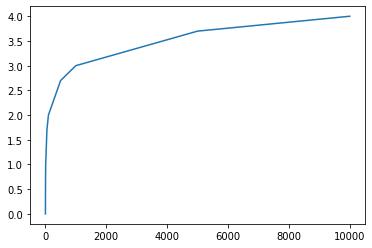

In [7]:
plt.plot(num, [math.log10(i) for i in num])

In [ ]:
# Sigmoid - Activation Functions
# These ares used to sqeeze the range into (0,1) 

In [ ]:
# 1 / (1 + e^(-x))

In [13]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn 
from sklearn.datasets import load_breast_cancer

In [14]:
data = load_breast_cancer()

In [15]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [19]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]

In [20]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [21]:
df["cancer"] = data.target

In [22]:
df.head()

mean radius  mean texture  ...  worst fractal dimension  cancer
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]

In [23]:
df.cancer.value_counts()

1    357
0    212
Name: cancer, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
df_train, df_test = train_test_split(df, test_size=0.1)

In [28]:
X_train = df_train.loc[:, :"worst fractal dimension"]
Y_train = df_train.loc[:, ["cancer"]]

X_test = df_test.loc[:, :"worst fractal dimension"]
Y_test = df_test.loc[:, ["cancer"]]

In [29]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((512, 30), (512, 1), (57, 30), (57, 1))

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
Y_test_pred = lr.predict(X_test)
Y_test_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [39]:
lr.predict_proba(X_test)

array([[8.21907826e-04, 9.99178092e-01],
       [3.22596694e-02, 9.67740331e-01],
       [4.26677711e-02, 9.57332229e-01],
       [5.84483837e-03, 9.94155162e-01],
       [6.49610859e-01, 3.50389141e-01],
       [1.50949474e-01, 8.49050526e-01],
       [1.68306065e-02, 9.83169394e-01],
       [9.99503443e-01, 4.96557031e-04],
       [3.83659795e-04, 9.99616340e-01],
       [5.74412345e-03, 9.94255877e-01],
       [9.99999693e-01, 3.06652842e-07],
       [1.72966009e-01, 8.27033991e-01],
       [9.99999999e-01, 1.34035766e-09],
       [6.00736284e-02, 9.39926372e-01],
       [9.99736007e-01, 2.63993107e-04],
       [9.09724681e-03, 9.90902753e-01],
       [5.79139088e-03, 9.94208609e-01],
       [6.68030276e-02, 9.33196972e-01],
       [9.65674784e-01, 3.43252160e-02],
       [5.32544142e-02, 9.46745586e-01],
       [1.28165519e-02, 9.87183448e-01],
       [2.84105570e-01, 7.15894430e-01],
       [9.97713937e-01, 2.28606272e-03],
       [2.82908357e-02, 9.71709164e-01],
       [1.904755

In [40]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(Y_test, Y_test_pred)

0.9298245614035088

In [49]:
(Y_test_pred == Y_test.cancer)# True -> value is same, false -> value is not same 
(Y_test_pred == Y_test.cancer).mean()

0.9298245614035088